In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example 3.3

Let us choose $n=3$ and $\Delta x = 1$. Then,

\begin{align}
    \hat{x}^2 = \frac{63}{12} + \mathbb{1}\otimes Z \otimes Z  + 2 Z \otimes \mathbb{1} \otimes Z  + 4 Z \otimes Z \otimes \mathbb{1},
\end{align}

and the evolution operator

\begin{align}
    \hat{U}(t)\equiv e^{-\frac{i}{2}\hat{x}^2 t} = e^{-i\frac{63}{24}t}
    e^{-\frac{i}{2}t\mathbb{1}\otimes Z \otimes Z}
    e^{-\frac{i}{2}2tZ \otimes \mathbb{1} \otimes Z}
    e^{-\frac{i}{2}4tZ \otimes Z \otimes \mathbb{1}}.
\end{align}

In [2]:
from qiskit import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm


## Direct exponentiation

In [3]:
def xhat(N, dx):
    xs = [(-0.5*(N-1) + i)*dx for i in range(N)]
    return np.diag(xs)
    
def phat(N, dx):
    phat = np.zeros([N,N], complex)
    for k in range(N):
        p = 2.0*np.pi*(-0.5*(N-1) + k)/(N*dx)
        pk = np.array([ np.exp(1.0j*2.0*np.pi*(-0.5*(N-1) + k)*(-0.5*(N-1) + i)/N) for i in range(N)])/np.sqrt(N)
        phat += p*np.kron(pk.reshape([N,1]), np.conj(pk))
    return phat

In [5]:
L = 8
xhat(L, 1)

array([[-3.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -1.5,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , -0.5,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  1.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  3.5]])

In [6]:
L = 8
Ud = expm(-0.5j*xhat(L, 1)@xhat(L, 1))
Ud

array([[ 0.98751477+0.15752643j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.99986235-0.01659189j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.43117652-0.90226759j,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.99219767-0.12467473j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0

## Circuit

In [7]:
def ZZ_decomp(th):
    """
    Implements the unitary U = exp(-0.5i * th * Z ⊗ Z).
    
    Parameters:
        th (float): The rotation angle θ.
    
    Returns:
        QuantumCircuit: The 2-qubit quantum circuit implementing the unitary.
    """
    # Create a 2-qubit quantum circuit with a custom name
    zz = QuantumCircuit(2, name=r'$e^{-\frac{i}{2}t Z\otimes Z}$')
    
    # Apply the decomposition
    zz.cx(1, 0)
    zz.rz(th, 0)  # Apply RZ gate with angle θ
    zz.cx(1, 0)
    
    return zz

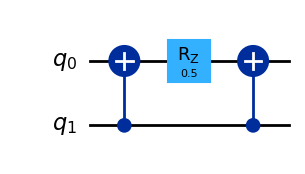

In [8]:
ZZ_decomp(0.5).draw('mpl')

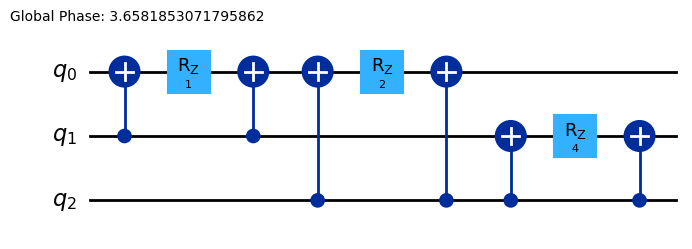

In [9]:
th = 1.0
n = 3
qc = QuantumCircuit(n)
qc.global_phase = -(4**n-1.0)/24.0

# Apply the decomposition
qc.cx(1, 0)
qc.rz(th, 0)  # Apply RZ gate with angle θ
qc.cx(1, 0)

qc.cx(2, 0)
qc.rz(2.0*th, 0)  # Apply RZ gate with angle θ
qc.cx(2, 0)

qc.cx(2, 1)
qc.rz(4.0*th, 1)  # Apply RZ gate with angle θ
qc.cx(2, 1)

qc.draw('mpl')

In [6]:
qc.draw('mpl').savefig("circuit_x2.pdf")

In [10]:
np.abs(Operator(qc).data - Ud)< 1e-15

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

Checked!

# Exmaple 3.4

In [11]:
L = 4 # 2^n
th = 1.0

Ud = expm(-0.5j*th*xhat(L, 1)@xhat(L, 1))
Ukin = expm(-0.5j*th*phat(L, 1)@phat(L, 1))
Ud

array([[0.43117652-0.90226759j, 0.        +0.j        ,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.99219767-0.12467473j,
        0.        +0.j        , 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.99219767-0.12467473j, 0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.        +0.j        , 0.43117652-0.90226759j]])

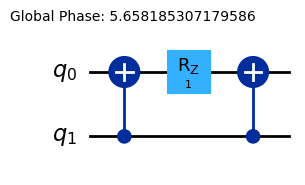

In [12]:
n = 2
qc = QuantumCircuit(n)
qc.global_phase = -(4**n-1.0)/24.0

# Apply the decomposition
qc.cx(1, 0)
qc.rz(th, 0)  # Apply RZ gate with angle θ
qc.cx(1, 0)

qc.draw('mpl')

In [13]:
np.abs(Operator(qc).data - Ud)< 1e-15

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [14]:
def UQFT():
    qc = QuantumCircuit(2, name='QFT')

    qc.h(1)
    qc.cs(0,1)
    qc.h(0)
    qc.swap(0,1)
    display(qc.draw('mpl'))

    return qc.to_instruction()

In [15]:
def UQFTd():
    r"""
    UQFT^\dagger
    """
    qc = QuantumCircuit(2, name=r'$QFT^\dagger$')

    qc.swap(0,1)
    qc.h(0)
    qc.cs(0,1)
    qc.cz(0,1)
    qc.h(1)

    display(qc.draw('mpl'))

    return qc.to_instruction()

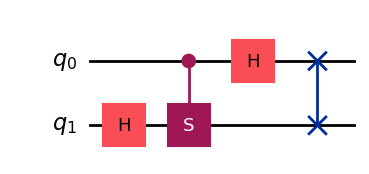

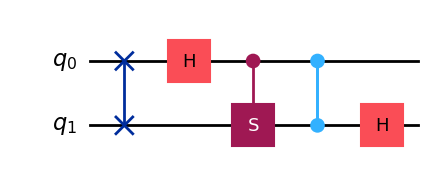

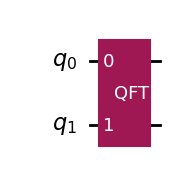

In [16]:
qc = QuantumCircuit(2)
qft = UQFT()
qftd = UQFTd()

qc.append(qft, [0, 1])
#qc.append(qftd, [0, 1])


qc.draw('mpl')

In [22]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

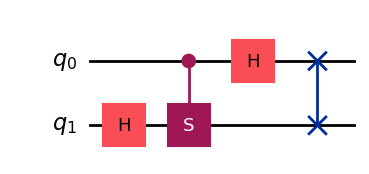

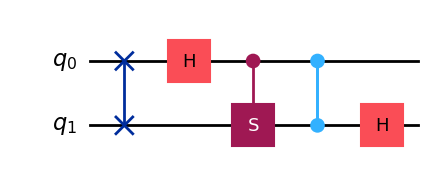

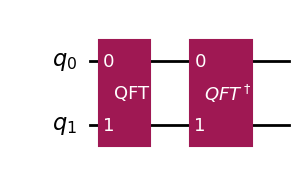

In [17]:
qc = QuantumCircuit(2)
qft = UQFT()
qftd = UQFTd()

qc.append(qft, [0, 1])
qc.append(qftd, [0, 1])


qc.draw('mpl')

In [23]:
Operator(qc).draw('latex')

<IPython.core.display.Latex object>

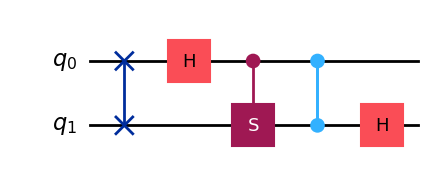

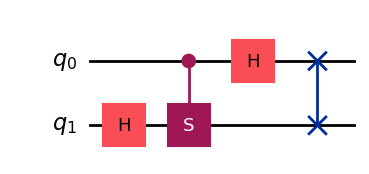

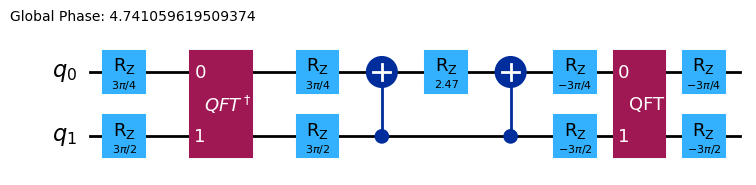

In [18]:
n = 2
th = 1.0
L = 2**n
delta = np.pi*(L-1.0)/L

qc = QuantumCircuit(2)

for i in range(n):
    qc.rz(2**i*delta, i)

qftd = UQFTd()

qc.append(qftd, [0, 1])

for i in range(n):
    qc.rz(2**i*delta, i)

L = 2**n
mu = 2.0*np.pi/L #dx=1

qc.global_phase = -(4**n-1.0)*mu*mu/24.0

# Apply the decomposition
qc.cx(1, 0)
qc.rz(th*mu*mu, 0)  # Apply RZ gate with angle θ
qc.cx(1, 0)

for i in range(n):
    qc.rz(-2**i*delta, i)

# QFT
qft = UQFT()
qc.append(qft, [0, 1])

for i in range(n):
    qc.rz(-2**i*delta, i)

pcirc = qc.draw('mpl')
pcirc

In [56]:
pcirc.savefig('circuit_kinetic.pdf')

In [19]:
L = 4 # 2^n
th = 1.0

Ud = expm(-0.5j*th*xhat(L, 1)@xhat(L, 1))
Ukin = expm(-0.5j*th*phat(L, 1)@phat(L, 1))
Ud

np.abs(Operator(qc).data-Ukin)<1e-15

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

# Exmaple 3.5

## Direct exponentiation

In [20]:
def xhat(N, dx):
    xs = [(-0.5*(N-1) + i)*dx for i in range(N)]
    return np.diag(xs)
    
def phat(N, dx):
    phat = np.zeros([N,N], complex)
    for k in range(N):
        p = 2.0*np.pi*(-0.5*(N-1) + k)/(N*dx)
        pk = np.array([ np.exp(1.0j*2.0*np.pi*(-0.5*(N-1) + k)*(-0.5*(N-1) + i)/N) for i in range(N)])/np.sqrt(N)
        phat += p*np.kron(pk.reshape([N,1]), np.conj(pk))
    return phat

In [21]:
dx = 1.0
n = 3
L = 2**n
pm = phat(L, dx)
xm = xhat(L, dx)

In [22]:
H = 0.5*(pm@pm+xm@xm)

In [23]:
eigenvalues, eigenvectors = np.linalg.eig(H)
idx = np.argsort(eigenvalues)  # Indices that would sort the eigenvalues
eigenvalues = eigenvalues[idx]  # Sorted eigenvalues
eigenvectors = eigenvectors[:, idx]  # Reorder the eigenvectors accordingly

In [24]:
eigenExact = [0.5 + i for i in range(L)]

In [25]:
np.abs(eigenvalues/eigenExact-1)

array([0.00036558, 0.00258476, 0.00963865, 0.04052924, 0.07794294,
       0.0841878 , 0.0901062 , 0.21358737])

In [26]:
np.array([[np.conj(eigenvectors[:,i])@(xm@pm - pm@xm)@eigenvectors[:,j] for j in range(L)] for i in range(L)])

array([[-6.16297582e-33+1.00020905e+00j,  8.88901454e-19+4.71844785e-16j,
        -2.10304253e-19-2.22857153e-03j, -8.39797227e-18+1.11022302e-16j,
        -6.66686906e-19+8.14562752e-03j,  1.33947567e-17+5.55111512e-17j,
        -2.03450775e-17-8.88178420e-16j, -1.80399306e-18-2.09285562e-02j],
       [-8.88901454e-19+4.44089210e-16j,  0.00000000e+00+9.85294751e-01j,
         7.68897781e-18+7.77156117e-16j,  1.03857478e-17+1.10221446e-01j,
         2.91373974e-17+6.38378239e-16j, -4.14916571e-17-1.94576330e-01j,
        -2.12922241e-18+2.60394087e-01j, -2.12364234e-17+4.71844785e-16j],
       [ 2.10304253e-19-2.22857153e-03j, -7.68897781e-18+7.77156117e-16j,
        -2.46519033e-32+1.02514483e+00j,  8.35208843e-17-1.24900090e-16j,
         1.50212717e-17-8.52448364e-02j, -1.50205836e-16-2.77555756e-17j,
         2.71004643e-16-3.88578059e-16j, -2.32854429e-18+2.85025310e-01j],
       [ 8.39797227e-18+1.11022302e-16j, -1.03857478e-17+1.10221446e-01j,
        -8.35208843e-17+1.34974373e

In [27]:
def output(matrix):
    latex_code = "\\begin{bmatrix}\n" + " \\\\\n".join(
        [" & ".join(f"{elem.real:.4f} + {elem.imag:.4f}i" if elem.imag >= 0 
                else f"{elem.real:.4f} - {-elem.imag:.4f}i" 
                for elem in row) for row in matrix]
    ) + "\n\\end{bmatrix}"

    return latex_code

In [54]:
print(output(np.array([[np.conj(eigenvectors[:,i])@(xm@pm - pm@xm)@eigenvectors[:,j] for j in range(L)] for i in range(L)])))

\begin{bmatrix}
-0.0000 + 1.0002i & 0.0000 - 0.0000i & 0.0000 - 0.0022i & 0.0000 + 0.0000i & 0.0000 + 0.0081i & -0.0000 - 0.0000i & 0.0000 + 0.0000i & 0.0000 - 0.0209i \\
-0.0000 - 0.0000i & -0.0000 + 0.9853i & 0.0000 - 0.0000i & -0.0000 - 0.1102i & 0.0000 - 0.0000i & -0.0000 + 0.1946i & -0.0000 - 0.2604i & -0.0000 + 0.0000i \\
-0.0000 - 0.0022i & -0.0000 + 0.0000i & 0.0000 + 1.0251i & -0.0000 - 0.0000i & -0.0000 - 0.0852i & 0.0000 - 0.0000i & -0.0000 + 0.0000i & 0.0000 + 0.2850i \\
-0.0000 + 0.0000i & 0.0000 - 0.1102i & 0.0000 - 0.0000i & 0.0000 + 0.1309i & 0.0000 - 0.0000i & -0.0000 + 1.5087i & -0.0000 - 2.4470i & 0.0000 + 0.0000i \\
-0.0000 + 0.0081i & -0.0000 - 0.0000i & 0.0000 - 0.0852i & -0.0000 - 0.0000i & 0.0000 + 1.3932i & 0.0000 + 0.0000i & -0.0000 - 0.0000i & 0.0000 - 0.7272i \\
0.0000 - 0.0000i & 0.0000 + 0.1946i & -0.0000 - 0.0000i & 0.0000 + 1.5087i & -0.0000 + 0.0000i & -0.0000 - 1.8826i & 0.0000 + 3.8117i & -0.0000 - 0.0000i \\
-0.0000 + 0.0000i & 0.0000 - 0.2604i & 0.0